In [11]:
# Dependencies
import json
from numpy import random
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from citipy import citipy
from config import openweather_key

In [12]:
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lon = np.random.uniform(low=-180.000, high=180.000, size=1500)

In [13]:
coords = {"Lat": lat, "Lng": lon}
df = pd.DataFrame(coords)

In [14]:
new_df = df.sample(n=15)
new_df.head()

,Lat,Lng
422,-74.275300,-93.193371
756,-11.179222,28.326064
1225,-4.143961,2.975275
1433,-88.910945,-92.555193
1059,-46.090121,-114.734815


In [15]:
new_df = new_df.reset_index(drop=True)
new_df.head()

,Lat,Lng
0,-74.275300,-93.193371
1,-11.179222,28.326064
2,-4.143961,2.975275
3,-88.910945,-92.555193
4,-46.090121,-114.734815


In [16]:
coordinates = tuple(zip(new_df["Lat"], new_df["Lng"]))
coordinates

((-74.275300121217157, -93.193370986615889),
 (-11.179222385108687, 28.326064364983807),
 (-4.1439610954130757, 2.9752753578886484),
 (-88.910945352665976, -92.55519318957181),
 (-46.090121016095253, -114.73481513679735),
 (32.017375137410909, -100.04180172320022),
 (-6.2589420184359028, 136.76082544978112),
 (-5.2108796731032356, 63.594251358776063),
 (-18.491976578857162, 119.12522823658725),
 (-34.898312834191096, -116.86226932324479),
 (41.091937704940904, -3.6306314013070278),
 (-65.298072588773934, -160.00753366856026),
 (8.1130429207303649, 64.074250409099022),
 (-78.389379945468676, -120.3126030645229),
 (-47.716473045377576, 71.176619912361872))

In [17]:
cities = []
city_name = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))

for city in cities:
    country_code = city.country_code
    name = city.city_name
    city_name.append(name)

In [18]:
new_df["City_Name"] = city_name
new_df.head()

,Lat,Lng,City_Name
0,-74.275300,-93.193371,punta arenas
1,-11.179222,28.326064,mansa
2,-4.143961,2.975275,port-gentil
3,-88.910945,-92.555193,punta arenas
4,-46.090121,-114.734815,rikitea


In [19]:
# OpenWeather config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [20]:
# Create empty column for desired data
new_df["Temperature"] = ""
new_df["Humidity"] = ""
new_df["Cloudiness"] = ""
new_df["Wind_Speed"] = ""
units = "imperial"
weather_data = []

# Counter
row_count = 0

# Loop through and run Google search to get all banks in 5 mile radius (8000 meters)
for index, row in new_df.iterrows():
    
    # Create endpoint url using Google Places Radar and the lat/lng we identified earlier
    target_url = url + "appid=" + openweather_key + "&units=" + units + "&q=" + str(new_df.loc[index]["City_Name"])

    # This link helps to handily see the JSON generated for each query
    print("Now retrieving city #%s: %s" % (row_count, new_df.loc[index]["City_Name"]))
    row_count += 1 
    print(target_url)
    
    # Run a request to grab the JSON at the target URL
    response = requests.get(target_url).json()
    weather_data.append(response)
    
    # Extract interesting data from responses
    temp_data = [data.get("main").get("temp") for data in weather_data]
    humidity_data = [data.get("main").get("humidity") for data in weather_data]
    cloud_data = [data.get("clouds").get("all") for data in weather_data]
    wind_data = [data.get("wind").get("speed") for data in weather_data]

    
    # Store the bank count into the Data Frame
    new_df.set_value(index, "Temperature", temp_data[-1])
    new_df.set_value(index, "Humidity", humidity_data[-1])
    new_df.set_value(index, "Cloudiness", cloud_data[-1])
    new_df.set_value(index, "Wind_Speed", wind_data[-1])

    # Reset Counts
    temp_data = []
    humidity_data = []
    cloud_data = []
    wind_data = []
    
# Visualize
new_df.head()

Now retrieving city #0: punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=480f9c5d42614026ec8d262bdebe16c9&units=imperial&q=punta arenas
Now retrieving city #1: mansa
http://api.openweathermap.org/data/2.5/weather?appid=480f9c5d42614026ec8d262bdebe16c9&units=imperial&q=mansa
Now retrieving city #2: port-gentil
http://api.openweathermap.org/data/2.5/weather?appid=480f9c5d42614026ec8d262bdebe16c9&units=imperial&q=port-gentil
Now retrieving city #3: punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=480f9c5d42614026ec8d262bdebe16c9&units=imperial&q=punta arenas
Now retrieving city #4: rikitea
http://api.openweathermap.org/data/2.5/weather?appid=480f9c5d42614026ec8d262bdebe16c9&units=imperial&q=rikitea
Now retrieving city #5: abilene
http://api.openweathermap.org/data/2.5/weather?appid=480f9c5d42614026ec8d262bdebe16c9&units=imperial&q=abilene
Now retrieving city #6: nabire
http://api.openweathermap.org/data/2.5/weather?appid=480f9c5d42614026ec8d262bdebe16c9&u

,Lat,Lng,City_Name,Temperature,Humidity,Cloudiness,Wind_Speed
0,-74.275300,-93.193371,punta arenas,40.83,100,36,37.02
1,-11.179222,28.326064,mansa,53.65,76,0,5.93
2,-4.143961,2.975275,port-gentil,77,88,90,3.36
3,-88.910945,-92.555193,punta arenas,40.83,100,36,37.02
4,-46.090121,-114.734815,rikitea,73.18,100,48,18.45


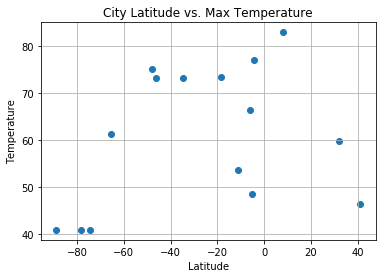

In [21]:
# Build a scatter plot for each data type
plt.scatter(new_df["Lat"], new_df["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()

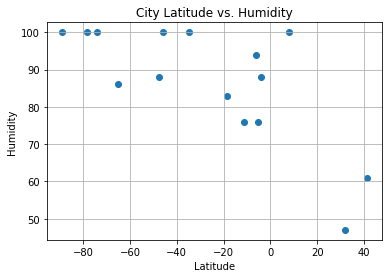

In [22]:
# Build a scatter plot for each data type
plt.scatter(new_df["Lat"], new_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()

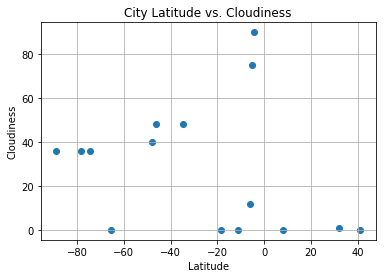

In [23]:
# Build a scatter plot for each data type
plt.scatter(new_df["Lat"], new_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()

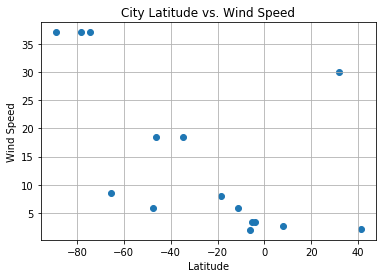

In [24]:
# Build a scatter plot for each data type
plt.scatter(new_df["Lat"], new_df["Wind_Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()